# A peek of developers' career from StackOverflow annual survey 2019


## List of Questions and Findings:

1. [Which programming language to learn next?](#Q1)<br>
2. [Which programming language is in high demand? what language might get you higher salary?](#Q2)<br>
3. [What is age factors in developer's career?](#Q3)<br>
4. [How does other developers recharge themselves in skills? ](#Q4)<br>
5. [What is a single trick that could boost your salary for future job seach effort?](#Q5)<br>
6. [What is a potential good option for IDE?](#Q6)<br>
7. [Which operating system is good fit for me?](#Q7)<br>
8. [How do you feel about your boss affect your salary or not?](#Q8)<br>
9. [Any gender gap on developer's career?](#Q9)<br>

## Import Library and Data

In [7]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [210]:
#print python version
from platform import python_version
print(python_version())

3.6.3


In [10]:
#print the version of each library
print (" numpy version:", np.__version__ ,
       "\n pandas version:", pd.__version__,
       "\n matplotlib version:", matplotlib.__version__)

 numpy version: 1.14.2 
 pandas version: 0.25.0 
 matplotlib version: 2.1.0


The data used in this project is available at:<br>
https://drive.google.com/open?id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV

In [24]:
df_schema = pd.read_csv('./data/survey_results_schema.csv')
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [68]:
df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


### <a class="anchor" id="Data-exploration">Data initial exploration before Data wrangling</a>


In [221]:
#There are about 85 questions in the questionair. We will need to focus on some of the questions. 
#About 89 thousand developers responded with survey. 
df.shape

(88883, 87)

In [222]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [223]:
# show the header and content of each question
df_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [224]:
list(df_schema[df_schema['Column']=='EduOther']['QuestionText'])[0]

'Which of the following types of non-degree education have you used or participated in? Please select all that apply.'

In [225]:
df['MainBranch'].value_counts(dropna=False)

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
NaN                                                                                552
Name: MainBranch, dtype: int64

In [226]:
df['Employment'].value_counts(dropna=False)

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
NaN                                                      1702
Retired                                                   358
Name: Employment, dtype: int64

In [227]:
#The developers responded to the survey are from 180 countries.
df['Country'].value_counts(dropna=False)

United States            20949
India                     9061
Germany                   5866
United Kingdom            5737
Canada                    3395
                         ...  
Saint Kitts and Nevis        1
Niger                        1
North Korea                  1
Chad                         1
Brunei Darussalam            1
Name: Country, Length: 180, dtype: int64

In [228]:
# I am curious about developers from China. It turns out that only 600 some developers responded the survey.
# Are they too busy, too shy, or simply not aware of this survey?

country_counts = df['Country'].value_counts(dropna=False)
country_counts['China']

664

In [229]:
df['ConvertedComp'].value_counts(dropna=False)

NaN          33060
2000000.0      709
1000000.0      558
120000.0       502
100000.0       480
             ...  
52826.0          1
12761.0          1
72888.0          1
7548.0           1
44947.0          1
Name: ConvertedComp, Length: 9163, dtype: int64

In [218]:
df['Age'].value_counts(dropna=False)

NaN     9673
25.0    4669
24.0    4428
27.0    4418
26.0    4397
        ... 
22.5       1
23.9       1
29.5       1
46.5       1
97.0       1
Name: Age, Length: 127, dtype: int64

In [219]:
#The education level ranges from elementary school(!/?) to Doctoral degree.
df['EdLevel'].value_counts(dropna=False)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
NaN                                                                                    2493
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [15]:
#Some nun value in the data. Needs some data cleaning.
df['UndergradMajor'].unique()

array([nan, 'Web development or web design',
       'Computer science, computer engineering, or software engineering',
       'Mathematics or statistics',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'Information systems, information technology, or system administration',
       'A business discipline (ex. accounting, finance, marketing)',
       'A natural science (ex. biology, chemistry, physics)',
       'A social science (ex. anthropology, psychology, political science)',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'A health science (ex. nursing, pharmacy, radiology)',
       'I never declared a major'], dtype=object)

In [16]:
#Some nun value in the data. Needs some data cleaning.
#Some data is out of range, indiating the developer is not truthful about their age. 
#We might want to focus on the more meaning range of ages.
df['Age'].value_counts(dropna=False)

NaN     9673
25.0    4669
24.0    4428
27.0    4418
26.0    4397
        ... 
22.5       1
23.9       1
29.5       1
46.5       1
97.0       1
Name: Age, Length: 127, dtype: int64

## Some findings for data exploration

Some columns have multiple answers as string concatinated with delimiters. We need to define a process to separate out individual answers before further analysis.

We might need to bucketize some of the columns (such as data related to age).

Some column are string values, but they can be meaningfully converted to ordinal numerical values for further statistical analysis, such as Job Satifaction.

A lot of columns have nan value, we need to fill or filter out them.

Some columns have extreme value, we might need to filter them out.

Some column have values that are statistically insignificant, which might needs attention. 

## Data cleaning and prepare the dataframe for further analysis

In [18]:
#clean up some of numerical columns from strings to numerics
#because most of the answers are intergers, only some of extreme values are represented with string. 
#For this study, it is reasonable to approximate the extreme values to a number on the boundary.

#Also, the columns generally have nan values.
#I used mean value to fill the nan values,since they represent a big chunk of data and I think filling the nan with mean value will not bias the results. 

#For the target columns, after all rows are filled interger values, the column datatype is converted to numeric to be sure.

#The following columns are of study interest and therefore processed based on their specific string values:
# Age1stCode, YearsCodePro, YearsCode


In [230]:
df['Age1stCode'].replace(['Younger than 5 years'], 4, inplace = True)

df['Age1stCode'].replace(['Older than 85'], 85, inplace = True)

df['Age1stCode'] = pd.to_numeric(df['Age1stCode'], errors='coerce')

df['Age1stCode'].fillna(value = df['Age1stCode'].mean(skipna = True), inplace = True)

In [231]:
df['YearsCodePro'].replace(['Less than 1 year'], 1, inplace = True)

df['YearsCodePro'].replace(['More than 50 years'], 50, inplace = True)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'].fillna(value = df['YearsCodePro'].mean(skipna = True), inplace = True)

In [232]:
df['YearsCode'].replace(['Less than 1 year'], 1, inplace = True)

df['YearsCode'].replace(['More than 50 years'], 50, inplace = True)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'].fillna(value = df['YearsCodePro'].mean(skipna = True), inplace = True)

## for some continuous variables, create bins to better assist statistical summary

In [233]:
#create bins for better statistical analysis
#I choose to focus on age range between 20-60, a reasonable working age range. 
#The range is then divided into bins with 5 years for each bin. 
#A column of Age_bin is created to facilitate further statistic analysis.

age_bins = np.array([0,20,25,30,35,40,45,50,55,60,100])
age_labels = np.array(['0-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-100'])

df['Age_bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [234]:
#create bins for better statistical analysis
#I choose to focus on age range between 10-25, a reasonable range to cover early starters in coding. 
#The range is then divided into bins with 5 years for each bin. 
#A column of Age1stCode_bins is created to facilitate further statistic analysis.

Age1stCode_bins = np.array([0,10,15,20,25,100])
Age1stCode_labels = np.array(['0-10','10-15','15-20','20-25','25-100'])

df['Age1stCode_bin'] = pd.cut(df['Age1stCode'], bins=Age1stCode_bins, labels=Age1stCode_labels, right=False)

## create a filtered dataframe for later statistical analysis

In [235]:
# create a copy of the dataframe for some further filtering process
df_filtered = df.copy()

#I noticed that answers beyond 20-60 years range often shows radical numbers, shadowing the credibility of the answer sheet.
#I choose to filter out the data beyond 20-60, which is working age and my study focus anyway.

df_filtered = df_filtered[(df_filtered['Age']>20) & (df_filtered['Age']<60) ]

df_filtered['JobSat'].fillna(value = 'Neither satisfied nor dissatisfied', inplace=True)

#Some of the categorical columns have nan values, I could not predict the value. Using mode does not seem to be a good option. 
#I choosed to filter the data for simplicity.  
df_filtered.dropna(subset = ['UndergradMajor', 'EdLevel', 'LanguageWorkedWith', 'LanguageDesireNextYear'], inplace = True)

#remove some radical answer
df_filtered = df_filtered[~(df_filtered['UndergradMajor'] == 'I never declared a major')]

#remove some more radical answers
df_filtered = df_filtered[~ ((df_filtered['EdLevel'] == 'Primary/elementary school') 
                           | (df_filtered['EdLevel'] == 'I never completed any formal education')  )]


In [236]:
## for some catgorical variables with ordinal nature, create ordinal value column.

SatLevel = {'Slightly satisfied': 1, 'Slightly dissatisfied' : -1,
       'Neither satisfied nor dissatisfied': 0, 'Very satisfied': 2,
       'Very dissatisfied': -2, }

df_filtered['JobSatLevel'] = df_filtered['JobSat'].apply(lambda val: SatLevel[val])

# define some functions to be used for question answering

In [191]:
def remove_outlier(df_in, col_name, low =0.05, high = 0.95):
    """
    Description: This function remove rows, by filter out extreme values from the target column of a dataframe.

    Arguments:
        df_in: the input dataframe. 
        col_name: The name of the target column to remove extreme values. 
        low: The low end quantile threthhold. 
        high: The high end quantile threthhold. 
    Returns:
        df_out_1: return a dataframe with the processed target column.
    """
    
    q1 = df_in[col_name].quantile(low)
    q3 = df_in[col_name].quantile(high)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    
    return df_out

In [59]:
#multiple-selection question analysis
from collections import defaultdict
def multipleSelection_stats(df, column_name, title, delimiter = ';'):
    
    """
    Description: This function map multiple choice answers for each row into multiple rows. Each selection in one row.

    Arguments:
        df: the input dataframe. 
        column_name: The name of the target column of multiple choice answer. 
        title: The question for the target columns as a tile for the output dataframe
        delimiter: The delimiter for multiple choice answer string
    Returns:
        df_out_1: return a dataframe with the target column mapped into one anwser per row.
    """
    
    out_dict = defaultdict(int)
    
    for ans in df[column_name].dropna():
        for selection in ans.split(delimiter):
            out_dict[selection] += 1
#     title = list(df_schema[df_schema['Column']==targetcolumn]['QuestionText'])[0]
    df_out = pd.DataFrame(list(out_dict.items()), columns=['answer', 'counts'])
    
    df_out_1 = pd.DataFrame(columns=['answer', 'counts'])

    for group in df_out.groupby(['counts'])['answer']:
        df_out_1 = df_out_1.append({'answer' : group[1].str.cat(sep=',') , 'counts' : group[0]}, ignore_index=True)
        
    df_out_1.sort_values(ascending=False,inplace=True,by=['counts'])
        
    return df_out_1
#

In [58]:
def heatmap_plot(hm_arr, x_tag, y_tag, y_label = 'Y Label', x_label = 'X Label', title = 'Chart Title'):
    
    """
    Description: The boilerplate code to generate a heat map for this study.

    Arguments:
        hm_arr: The input 2d numpy array. 
        x_tag: The list of x axis, one tag for each column.
        y_tag: The list of y axis, one tag for each row
        x_label: The label for x axis
        y_label: The label for y axis
        title: The char title
    Returns:
        fig: The generated 2d heatmap figure object.
    """


    fig, ax = plt.subplots()
    im = ax.imshow(hm_arr)

    fig.set_size_inches(18.5, 10.5)


    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_tag)))
    ax.set_yticks(np.arange(len(y_tag)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_tag)
    ax.set_yticklabels(y_tag)

    plt.ylabel(y_label)
    plt.xlabel(x_label)


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_title(title)
    fig.tight_layout()
    
    return fig    

# Questions with Findings

## Question 1: <a class="anchor" id="Q1"> </a>


Given a programming language you are working with now, what other language you might want to know and learn? 

For the language developer is working on, what is the retention rate?(Are they happy with the current language?)

The developer would be better guided in developing their skills set, with the findings.

In [197]:
# we still have more than 50k samples, suitable for statistically analysis of this study.
df_filtered[['LanguageWorkedWith','LanguageDesireNextYear']].shape[0]

50674

In [198]:
#The data after some inital cleaning is used for this analysis
lang_migrate_summary = df_filtered[['LanguageWorkedWith','LanguageDesireNextYear']]


In [199]:
#make sure no nan value
lang_migrate_summary.isna().any()

LanguageWorkedWith        False
LanguageDesireNextYear    False
dtype: bool

In [79]:
#this segment creates a dataframe with one unique answer for each row of the target column, 
#with the answer as first column, and counts for each of the orginal column
#for the rows with two target columns of same value, we set them to be zero. 
#This presumably helps the heatmap to be more illustrative.

#split multiple answer string into list
lang_migrate_summary['LanguageWorkedWith'] = lang_migrate_summary['LanguageWorkedWith'].str.split(';')
lang_migrate_summary['LanguageDesireNextYear'] = lang_migrate_summary['LanguageDesireNextYear'].str.split(';')

# expand list into multiple rows 
lang_migrate_summary = lang_migrate_summary.explode(column = 'LanguageWorkedWith' )
lang_migrate_summary = lang_migrate_summary.explode(column = 'LanguageDesireNextYear' )

#mark, zero out the diagnal term
lang_migrate_summary['same'] = (lang_migrate_summary['LanguageWorkedWith'] == lang_migrate_summary['LanguageDesireNextYear'])

#count duplicate rows and add the count to a separate column
lang_migrate_summary['counts'] = lang_migrate_summary.groupby(['LanguageWorkedWith','LanguageDesireNextYear']).transform('count')

# remove duplicate rows
lang_migrate_summary.drop_duplicates(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
#pivot the dataframe into 2D array for heat map plots
df_heatmap = lang_migrate_summary.drop(columns = ['same']).pivot(index='LanguageWorkedWith', columns='LanguageDesireNextYear', values='counts')

df_heatmap.fillna(0, inplace = True)

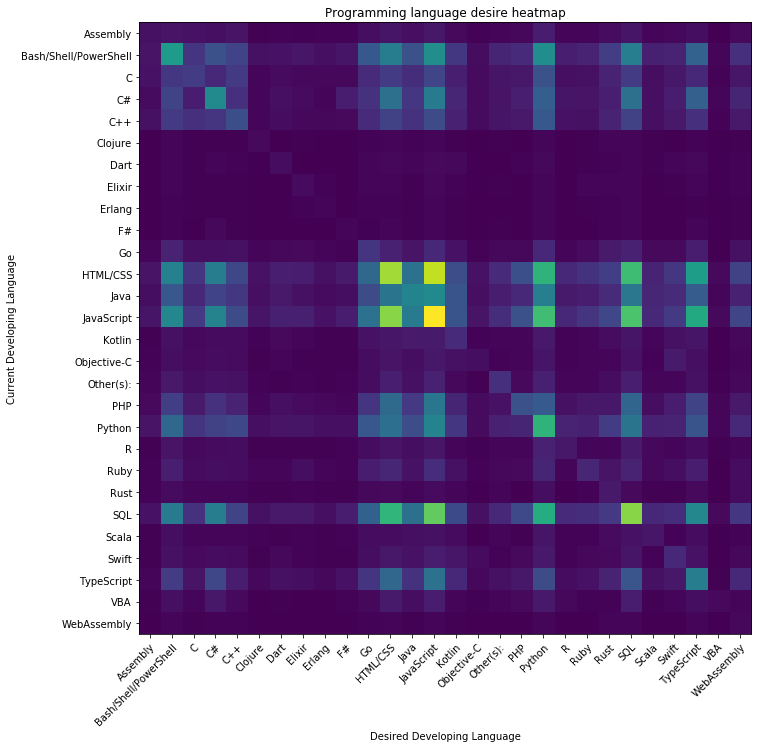

In [81]:
#create heatmap plot 
hm_arr = df_heatmap.to_numpy()
x_tag = df_heatmap.columns
y_tag = df_heatmap.index
fig = heatmap_plot(hm_arr, x_tag, y_tag, 
                   y_label = 'Current Developing Language', 
                   x_label = 'Desired Developing Language', 
                   title = 'Programming language desire heatmap')

fig.savefig('./output/languagedesire_full.png', dpi=100)

plt.show()

In [82]:
# filter out less used language, focus on top 12 popular language
target_lang = ['Bash/Shell/PowerShell','Go', 'HTML/CSS', 'Java', 'JavaScript','PHP', 'Python', 'R', 'Ruby', 'SQL', 'Scala', 'TypeScript']

lang_migrate_summary_less = lang_migrate_summary[(lang_migrate_summary['LanguageWorkedWith'].isin(target_lang)) & (lang_migrate_summary['LanguageDesireNextYear'].isin(target_lang)) ]

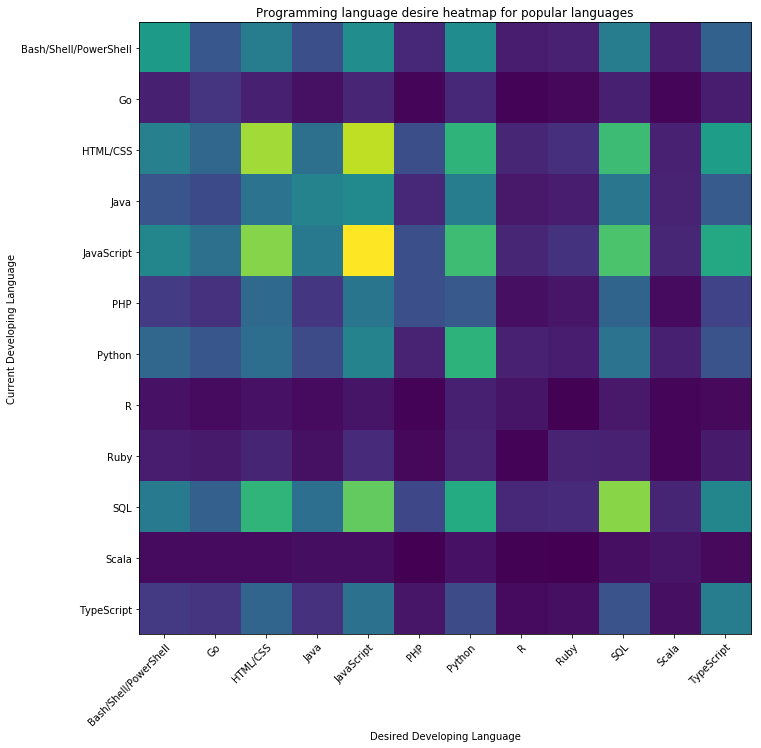

In [84]:

#pivot the table into 2D array
df_heatmap = lang_migrate_summary_less.drop(columns = ['same']).pivot(index='LanguageWorkedWith', columns='LanguageDesireNextYear', values='counts')
df_heatmap.fillna(0, inplace = True)

#create heatmap plot 
hm_arr = df_heatmap.to_numpy()

x_tag = df_heatmap.columns

y_tag = df_heatmap.index

fig = heatmap_plot(hm_arr, x_tag, y_tag, 
                   y_label = 'Current Developing Language', 
                   x_label = 'Desired Developing Language', 
                   title = 'Programming language desire heatmap for popular languages')

fig.savefig('./output/languagedesire_popular.png', dpi=100)

plt.show()

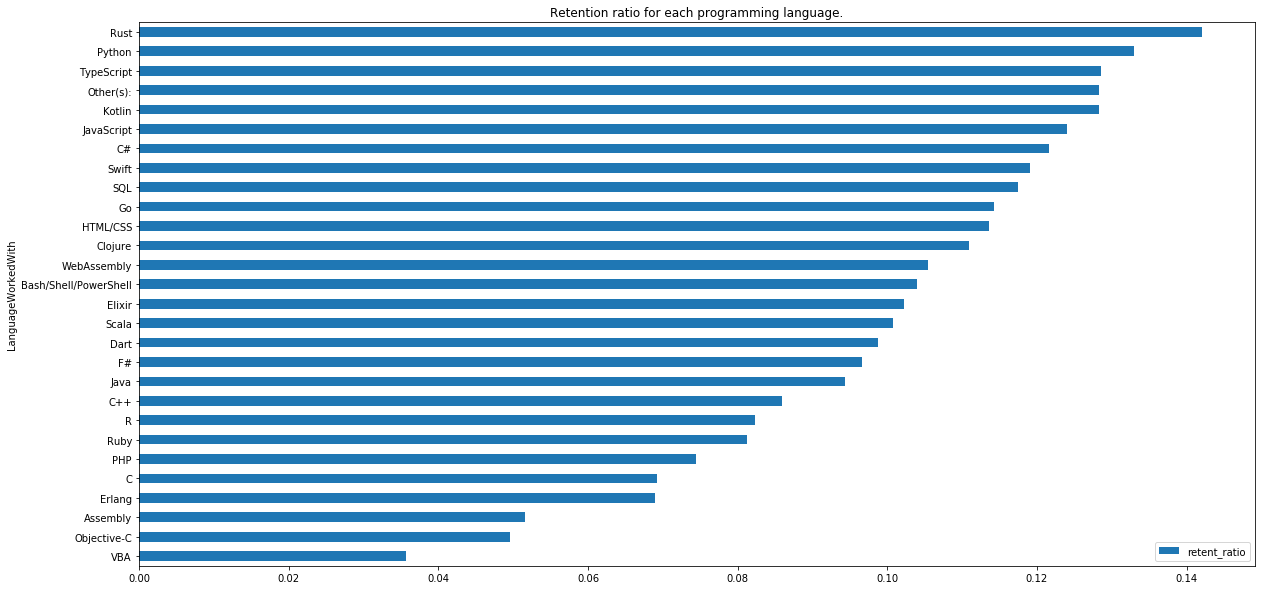

In [20]:
#find lanuage retention rate (If developer selected to continue coding with the current language they are using?)
lang_migrate_summary['total'] = lang_migrate_summary['LanguageWorkedWith'].apply(
    lambda col: lang_migrate_summary[lang_migrate_summary['LanguageWorkedWith']  == col]['counts'].sum())

lang_migrate_summary['retent_ratio'] =  lang_migrate_summary['counts']/lang_migrate_summary['total']

data_plot_bar = lang_migrate_summary[lang_migrate_summary['same'] == True][['LanguageWorkedWith','retent_ratio']]

data_plot_bar.sort_values(['retent_ratio'], ascending =  True, inplace = True)
data_plot_bar.plot.barh(y = 'retent_ratio', x = 'LanguageWorkedWith', figsize = (20, 10), legend = True, title = 'Retention ratio for each programming language.')

## Findings: 

Correlation patterns between various languages are shown in the heatmap. The heatmap could serve as skill set development guideance for developers who want to expand from their current technical field to other related field.

Diagnal values are set to zero, which is potential too high comparing to the off-diagnal values, to ensure heatmap color scale is in check. The diagnal values are presented in a separate plot, toward the end of the supporting analysis of this question. While Rust has the highest rentention rate, Python, Typescript, javascript are high in list as well as a popular language.

Javascript, SQL, HTML/CSS developers are most eager to learn other languages. These three languages also have high correlations, indicating they are a set of essential and complementary skills during daily work. 


## Question 2: <a class="anchor" id="Q2"> </a>


Which programming language is in high demand? what language might get you higher salary?

In [237]:
lang_comp_summary = df_filtered[['LanguageWorkedWith','Country','ConvertedComp']]

In [238]:
lang_comp_summary.isna().any()

LanguageWorkedWith    False
Country               False
ConvertedComp          True
dtype: bool

In [239]:
#There are some nan and exterme values in converted compensation. 
#A lot of people are not comfortable to tell they salary. 
#For this study, we will not filter out the compensation. 
#The mean calculation will skip them, while we still retain the data regardin their programming language.

In [240]:
#First filter out extreme values
df_filtered = remove_outlier(df_filtered, 'ConvertedComp', low = 0.05, high = 0.95 )

In [241]:
#We limit the compensation range to be a reasonable range of 5000 USD and 500000 USD
df_filtered = df_filtered[(df_filtered['ConvertedComp']>5000) & (df_filtered['ConvertedComp']<500000) ]

In [242]:
lang_comp_summary['LanguageWorkedWith'] = df_filtered['LanguageWorkedWith'].str.split(';')

# conver string value into list for target column 
lang_comp_summary = lang_comp_summary.explode(column = 'LanguageWorkedWith' )

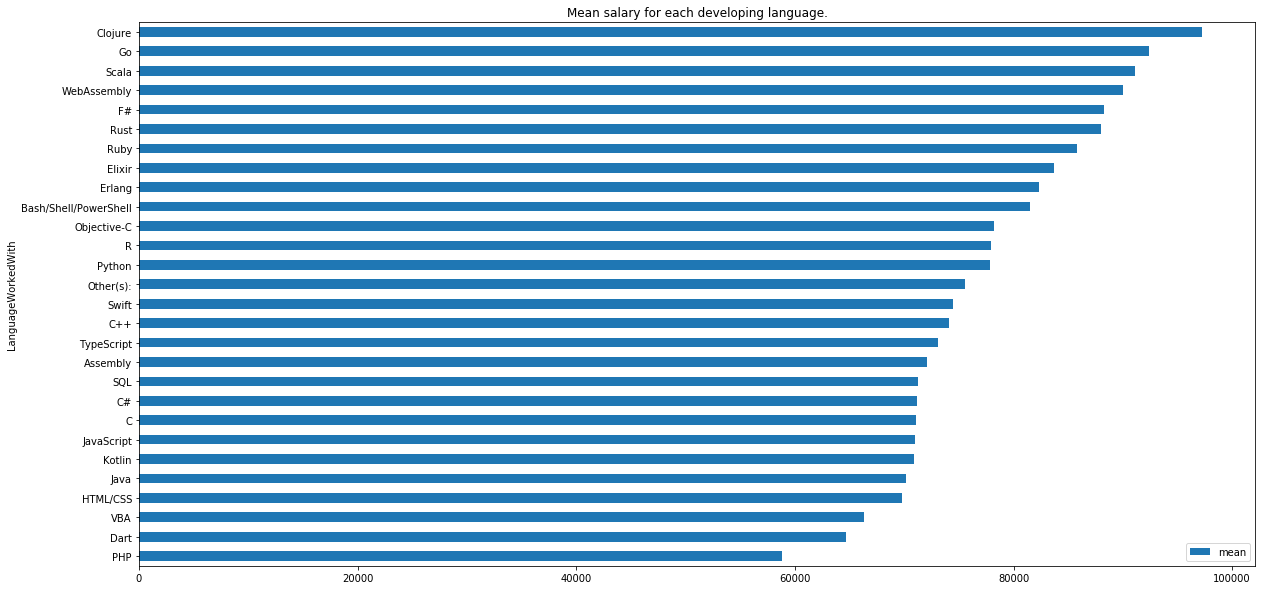

In [243]:
data_plot_bar = lang_comp_summary.groupby(['LanguageWorkedWith'])['ConvertedComp'].agg(['mean','count'])

data_plot_bar = data_plot_bar.round({'mean': 0}).sort_values(['mean'], ascending = True)

barh = data_plot_bar.plot.barh(y = 'mean', figsize = (20, 10), legend = True, title = 'Mean salary for each developing language.')


In [247]:
fig = barh.get_figure()
fig.savefig("./output/lang_salary.png")

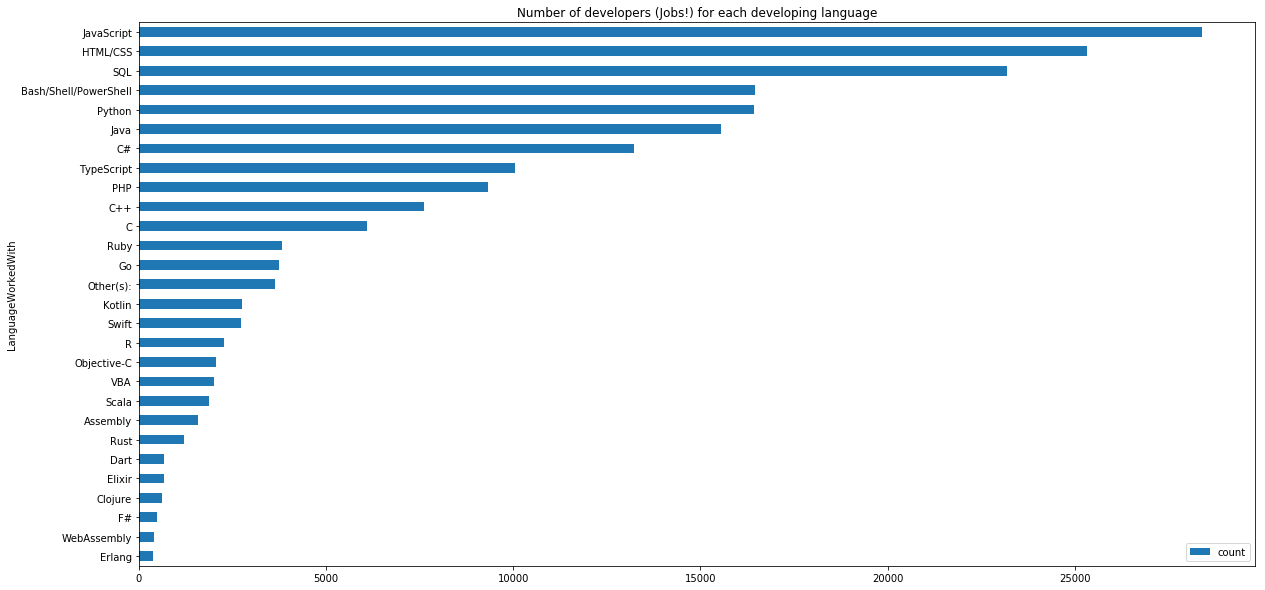

In [249]:
data_plot_bar.sort_values(['count'], ascending = True, inplace= True)
barh = data_plot_bar.plot.barh(y = 'count', figsize = (20, 10), legend = True, title = 'Number of developers (Jobs!) for each developing language')

In [250]:
fig = barh.get_figure()
fig.savefig("./output/lang_popularity.png")

## Findings:
I presented the findings in two plots:
1. sorted by mean salary. 
2. sorted by number of developers. 

It seems that some special language get highest salary with lowest demand, like: Clojure, Go, Scala, etc, indicating they belong to niche skill market.

For languages with high demand, Javascript crowns, followed by HTML/CSS, SQL. But they do not get high avarage salary compare to other languages.

Python certainly is both in high demand and pays well. 

It is noteworthy that the language of 'Bash/Shell/PowerShell' seems to an essential skill for high salary in high demand.

## Question 3: <a class="anchor" id="Q3"> </a>

Age factors in your developer career:

There is a myst that programming is only good for young guys. Is that true?

Given certain age, what is the outlook for:
* weekly work hours
* compensation
* most importantly, are you still going to be happy about your job?

In [228]:
#given the computer programming as a career is relatively new compare to other industry, 
#the growing of developer over the time is not considered.
df_filtered.groupby(['Age_bin'])['Respondent'].count()

Age_bin
0-20            0
20-25     1855744
25-30     2907092
30-35     1985051
35-40     1317836
40-45      690904
45-50      349903
50-55      211897
55-60      114275
60-100          0
Name: Respondent, dtype: int64

In [188]:
df_filtered['WorkWeekHrs'].value_counts(dropna=False)

40.0      24327
45.0       5143
50.0       3660
NaN        3270
35.0       2518
          ...  
62.5          1
137.5         1
6.4           1
39.8          1
4850.0        1
Name: WorkWeekHrs, Length: 182, dtype: int64

In [251]:
#find some nan and extreme values in the working hours. 
df_filtered.dropna(subset=['WorkWeekHrs'], inplace=True)

In [252]:
df_filtered = remove_outlier(df_filtered, 'WorkWeekHrs', low = 0.05, high = 0.95 )

In [255]:
#there are still a lot of extreme values. Like 1 hour per week, 145 hour per week. 
#we will focus on weekly working hours reasonable range of 10 to 100 hours
df_filtered = df_filtered[(df_filtered['WorkWeekHrs']>10) & (df_filtered['WorkWeekHrs']<100) ]

In [256]:
df_filtered['WorkWeekHrs'].value_counts(dropna=False)

40.00    20067
45.00     4012
50.00     2717
35.00     2141
38.00     1097
         ...  
39.25        1
43.40        1
62.00        1
73.00        1
67.00        1
Name: WorkWeekHrs, Length: 104, dtype: int64

In [257]:
df_filtered['WorkWeekHrs'].unique()

array([40.  , 15.  , 32.  , 45.  , 35.  , 39.  , 50.  , 42.  , 70.  ,
       38.  , 25.  , 44.  , 75.  , 48.  , 37.  , 30.  , 37.5 , 36.  ,
       34.  , 43.  , 60.  , 28.  , 20.  , 55.  , 41.  , 42.5 , 38.5 ,
       52.  , 12.  , 33.  , 46.  , 13.  , 47.  , 24.  , 49.  , 65.  ,
       58.  , 36.25, 11.  , 14.  , 36.5 , 22.2 , 62.  , 41.5 , 21.  ,
       51.  , 54.  , 56.  , 17.  , 16.  , 22.  , 18.  , 47.5 , 37.25,
       66.  , 57.  , 32.5 , 31.5 , 79.  , 29.  , 76.  , 31.  , 19.  ,
       23.  , 37.75, 34.5 , 74.  , 53.  , 22.5 , 36.75, 33.5 , 72.5 ,
       61.  , 77.  , 16.5 , 35.5 , 27.  , 72.  , 69.  , 26.  , 40.5 ,
       67.  , 38.75, 33.6 , 37.6 , 63.  , 38.3 , 43.4 , 62.5 , 39.75,
       73.  , 39.5 , 32.25, 66.5 , 37.8 , 57.5 , 47.25, 19.25, 19.5 ,
       46.5 , 39.25, 39.8 , 41.25, 52.5 ])

In [260]:
#check out job satisfaction level
df_filtered['JobSatLevel'].value_counts(dropna=False)

 1    13733
 2    12787
-1     6001
 0     4137
-2     2568
Name: JobSatLevel, dtype: int64

In [263]:
#check out age bin
df_filtered['Age_bin'].value_counts(dropna=False)

25-30     12864
30-35      9530
35-40      5761
20-25      5519
40-45      2832
45-50      1437
50-55       852
55-60       431
60-100        0
0-20          0
Name: Age_bin, dtype: int64

In [ ]:
#it seems that the developer number reduce by half for every 5 year after 35 years old
#we need to plot the trend

In [ ]:
#We have processed the compensation data before, therefore, not look into hereby.

In [278]:
#summarize the data for US developers
summary_us = df_filtered[df_filtered['Country'] == 'United States'].groupby(['Age_bin']).mean()[['ConvertedComp', 'WorkWeekHrs','JobSatLevel']]
summary_us = summary_us.round({'ConvertedComp': 0, 'WorkWeekHrs': 1, 'JobSatLevel': 2})

In [299]:
#get counts for each age bin
temp = df_filtered[df_filtered['Country'] == 'United States'].groupby(['Age_bin'])['ConvertedComp'].count().rename('counts')

In [304]:
summary_us = pd.merge(summary_us, temp, left_index=True, right_index=True)

In [306]:
summary_us.reset_index(inplace=True)
#again, focus on age between 20 and 60
summary_us = summary_us[~((summary_us['Age_bin']=='0-20') | (summary_us['Age_bin']=='60-100'))]

In [322]:
summary_us

,Age_bin,ConvertedComp,WorkWeekHrs,JobSatLevel,counts
1,20-25,84336.0,40.7,0.97,1450
2,25-30,105242.0,41.5,0.93,3089
3,30-35,122272.0,41.8,0.91,2600
4,35-40,131883.0,41.9,0.91,1764
5,40-45,137684.0,42.4,0.86,969
6,45-50,140796.0,43.1,0.79,549
7,50-55,141255.0,43.5,0.80,392
8,55-60,142528.0,43.5,1.00,230


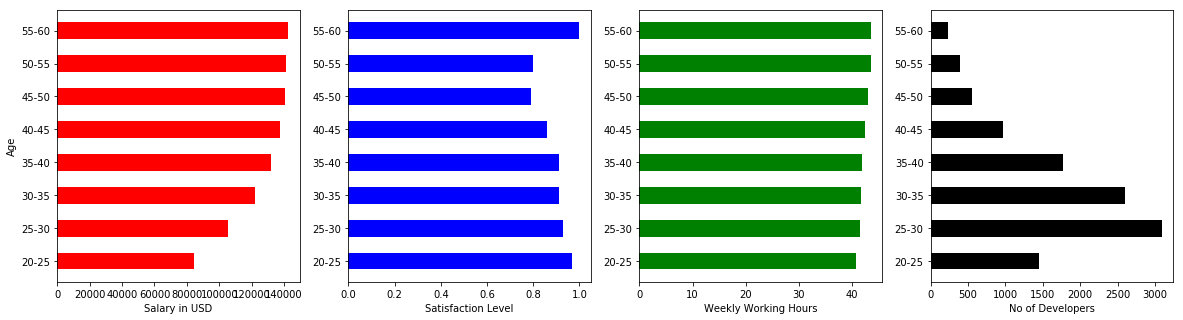

In [330]:
#create three subplots to present the data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20, 5))
# ax1.plot(x, y)
# ax1.set_title('Compensation')
# ax2.set_title('JobSatLevel')
# ax3.set_title('WorkWeekHrs')
# ax3.set_title('No of Developers')

width = 0.5
ax1.barh(summary_us['Age_bin'],summary_us['ConvertedComp'], width, color = ['r'])
ax2.barh(summary_us['Age_bin'],summary_us['JobSatLevel'], width,  color = ['b'])
ax3.barh(summary_us['Age_bin'],summary_us['WorkWeekHrs'], width,  color = ['g'])
ax4.barh(summary_us['Age_bin'],summary_us['counts'], width,  color = ['black'])
# fig(figsize =(30, 20))

ax1.set_ylabel('Age')
ax1.set_xlabel('Salary in USD')
ax2.set_xlabel('Satisfaction Level')
ax3.set_xlabel('Weekly Working Hours')
ax4.set_xlabel('No of Developers')

fig.savefig('./output/Age_Effect_USA.png', dpi=100)


In [318]:
summary = df_filtered.groupby(['Age_bin']).mean()[['ConvertedComp', 'WorkWeekHrs','JobSatLevel']]
summary = summary.round({'ConvertedComp': 0, 'WorkWeekHrs': 1, 'JobSatLevel': 2})

In [326]:
#get counts for each age bin
temp = df_filtered.groupby(['Age_bin'])['ConvertedComp'].count().rename('counts')

#combine target column value with counts
summary = pd.merge(summary, temp, left_index=True, right_index=True)

summary.reset_index(inplace=True)
#again, focus on age between 20 and 60
summary = summary[~((summary['Age_bin']=='0-20') | (summary['Age_bin']=='60-100'))]

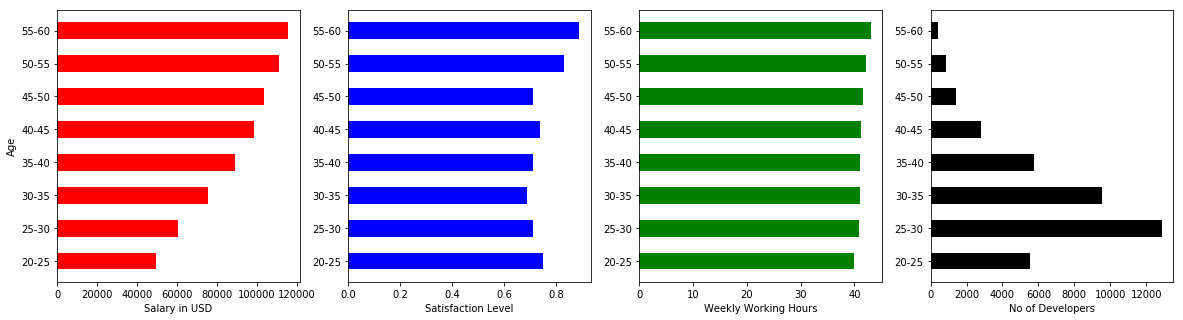

In [331]:
#create three subplots to present the data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20, 5))
# ax1.plot(x, y)
# ax1.set_title('Compensation')
# ax2.set_title('JobSatLevel')
# ax3.set_title('WorkWeekHrs')

width = 0.5
ax1.barh(summary['Age_bin'],summary['ConvertedComp'], width, color = ['r'])
ax2.barh(summary['Age_bin'],summary['JobSatLevel'], width,  color = ['b'])
ax3.barh(summary['Age_bin'],summary['WorkWeekHrs'], width,  color = ['g'])
ax4.barh(summary['Age_bin'],summary['counts'], width,  color = ['black'])

ax1.set_ylabel('Age')
ax1.set_xlabel('Salary in USD')
ax2.set_xlabel('Satisfaction Level')
ax3.set_xlabel('Weekly Working Hours')
ax4.set_xlabel('No of Developers')

fig.savefig('./output/Age_Effect_World.png', dpi=100)

## Findings: 

Since the compensation varies a lot among different country, we look into US developer's statistics and world-wide developers's statistics seperately.

The age range is also limited between 20 - 60 years.

Similar trend was found for US developers and developers worldwide. 

The total number of developers reduces by half for every 5 year after 35 years old.

For US developers, the salary increased rapidly in early part of career, but plateaued after 45 years old. 

For the developers worldwide, the salary in the early career is low, but have more steady increasing trend throughout the career.

Job satifaction data is a mix and diffcult to draw conclusion.

The working hours, to my suprise, increased steady over time.



## Question 4: <a class="anchor" id="Q4"> </a>

It is world with technology evolving on a daily basis, we need to constantly learn new skills, how does other developers recharge themselves in skills? 

How does each choice of learning turn out for them in terms of geting better paid? Put the question in another way, how do highly paid developers learn new skills?

In [333]:
df_filtered['EduOther'].value_counts(dropna=False)

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                                                                                                                   2446
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                                       2433
Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course                                                                                                    

In [ ]:
#it looks that developers are learning new knowledge in multiple ways. 
#We will seperate out each method and find out their frequencies. 

In [334]:
learn_comp_summary = df_filtered[['EduOther','ConvertedComp']]
learn_comp_summary['EduOther'] = df_filtered['EduOther'].str.split(';')

# conver string value into list for target column 
learn_comp_summary = learn_comp_summary.explode(column = 'EduOther')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [335]:
data_plot_bar = learn_comp_summary.groupby(['EduOther'])['ConvertedComp'].agg(['mean','count'])
data_plot_bar.round({'mean': 0}).sort_values(['mean'], ascending = True, inplace = True)
data_plot_bar.reset_index(inplace=True)

data_plot_bar.columns = ['EduOther', 'Mean_Compensation', 'Counts']

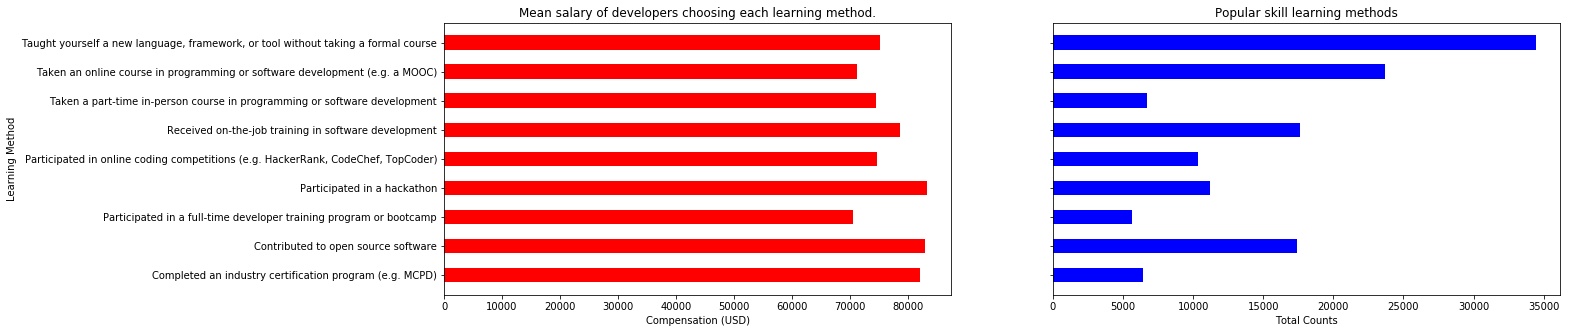

In [336]:
#create three subplots to present the data
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5), sharey=True)
# ax1.plot(x, y)
ax1.set_title('Mean salary of developers choosing each learning method.')
ax2.set_title('Popular skill learning methods')

width = 0.5
ax1.barh(data_plot_bar['EduOther'], data_plot_bar['Mean_Compensation'], width, color = ['r'])
ax2.barh(data_plot_bar['EduOther'], data_plot_bar['Counts'], width,  color = ['b'])


ax1.set_ylabel('Learning Method')
ax1.set_xlabel('Compensation (USD)')
ax2.set_xlabel('Total Counts')

fig.savefig('./output/Learning_method.png', dpi=100)

## Findings:

It looks like developers like the concept of 'DIY'. They either directly hack at it or watch online video/courses to learn new skills.

However, in terms of most rewarding methods, the 'DIY' methods seem not to be doing so well. It pays offer to participate competition, contribute to open source code, or get certificate.

I think it might be a chicken-egg issue. 
It is the developers have better resource or highly skilled already, would choose the more diffcult route which better rewarding. 

For new developers, who came in large numbers and typically have lower salary, the DIY, training camp etc, seems to a popular and valid choice toward professional developer career. 


## Question 5: <a class="anchor" id="Q5"> </a>

What is a single trick that could boost your salary for future job seach effort?

In [128]:
df_filtered['FizzBuzz'].value_counts(dropna=False)

No     45510
Yes     8085
NaN      510
Name: FizzBuzz, dtype: int64

In [104]:
#It looks that only a fraction of developers knows FizzBuzz.
#Does fizzbuzz solving experience indicate higher salary (elite developer?)

summary = df_filtered.groupby(['EdLevel','FizzBuzz']).mean(numeric_only = True)
summary.drop(columns= ['Respondent','CodeRevHrs','CompTotal'] , inplace = True)

summary.reset_index(inplace=True) 
summary = summary.pivot(index='EdLevel', columns='FizzBuzz', values='ConvertedComp')
# summary
summary.reset_index(inplace=True) 

summary['inc_ratio']= summary['Yes']/summary['No'] -1

summary

FizzBuzz,EdLevel,No,Yes,inc_ratio
0,Associate degree,132433.391745,191246.395652,0.444095
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",127180.844929,168271.964645,0.323092
2,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",115812.996575,142408.182535,0.229639
3,"Other doctoral degree (Ph.D, Ed.D., etc.)",168884.148232,254277.221239,0.505631
4,"Professional degree (JD, MD, etc.)",74458.706294,114781.912281,0.541551
5,Some college/university study without earning ...,110081.531958,149953.766265,0.362206


In [105]:
summary['inc_ratio'].max()

0.5415512569871743

In [106]:
# does fizzbuzz solving experience indicate higher salary (elite developer?)

summary_1 = df_filtered.groupby(['Age_bin','FizzBuzz']).mean(numeric_only = True)
summary_1.drop(columns= ['Respondent','CodeRevHrs','CompTotal'] , inplace = True)

summary_1.reset_index(inplace=True) 
summary_1 = summary_1[~((summary_1['Age_bin']=='0-20') | (summary_1['Age_bin']=='60-100'))]
summary_1 = summary_1.pivot(index='Age_bin', columns='FizzBuzz', values='ConvertedComp')
summary_1.reset_index(inplace=True) 

summary_1['inc_ratio']= summary_1['Yes']/summary_1['No'] -1

summary_1

FizzBuzz,Age_bin,No,Yes,inc_ratio
0,20-25,85775.852112,121241.734325,0.413472
1,25-30,102205.841481,146370.813409,0.432118
2,30-35,128670.730496,178042.251109,0.383704
3,35-40,150143.241360,173072.252226,0.152714
4,40-45,170195.286342,202529.738035,0.189984
5,45-50,173003.679056,213164.376344,0.232138
6,50-55,174697.658711,182810.519608,0.046439
7,55-60,204517.621076,358873.428571,0.754731


In [126]:
summary_1['inc_ratio'].max()
#wow

0.7547310920346557

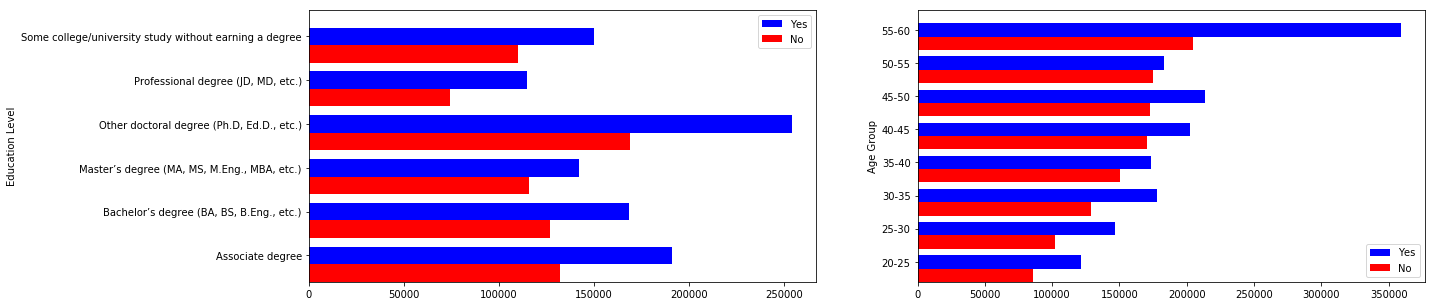

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
width = 0.4

ind_1 = np.arange(len(summary))
ax1.barh(ind_1 + width, summary['Yes'], width, color='blue', label='Yes')
ax1.barh(ind_1 , summary['No'], width, color='red', label='No')
ax1.set(yticks=ind_1 + width, yticklabels=summary['EdLevel'], ylim=[2*width - 1, len(summary)])
ax1.legend()
ax1.set_ylabel('Education Level')

ind_2 = np.arange(len(summary_1))
ax2.barh(ind_2+ width , summary_1['Yes'], width, color='blue', label='Yes')
ax2.barh(ind_2, summary_1['No'], width, color='red', label='No')
ax2.set(yticks=ind_2 + width, yticklabels=summary_1['Age_bin'], ylim=[2*width - 1, len(summary_1)])
ax2.legend()
ax2.set_ylabel('Age Group')

fig.savefig('./output/FizzBuzz_Compensation.png', dpi=100)

## Findings:
FizzBuzz! 

Wow! Look at the difference! 
Hard to believe, wondering if it is true...

If it is true, it is never too late to say hello to FizzBuzz!


## Question 6: <a class="anchor" id="Q6"> </a>

If you just started coding and need to use IDE for development, what is a potential good option?
There are many choices for IDE, we would want to focus on our effort on coding instead of learning IDE. Therefore, select an IDE that would last for the long haul is very helpful.

In [125]:
df_filtered['DevEnviron'].value_counts(dropna=False)

Visual Studio Code                                     3054
Visual Studio;Visual Studio Code                       2605
Notepad++;Visual Studio;Visual Studio Code             2404
Vim                                                    1436
Notepad++;Visual Studio                                1313
                                                       ... 
Atom;Komodo;Visual Studio Code                            1
Eclipse;IntelliJ;Notepad++;RubyMine                       1
IntelliJ;IPython / Jupyter;Visual Studio Code;Xcode       1
Eclipse;Notepad++;PHPStorm;Visual Studio Code             1
Sublime Text;Vim;Visual Studio;Xcode                      1
Name: DevEnviron, Length: 5196, dtype: int64

In [252]:
#it looks that developers are using multiple IDEs for their work. 
#We will seperate out each IDE and find out their frequencies. 
targetcolumn, delimiter = 'DevEnviron', ';'

title = list(df_schema[df_schema['Column']==targetcolumn]['QuestionText'])[0]
temp= multipleSelection_stats(df,targetcolumn, title, delimiter)
print('Question:', title)
temp.head(10)

Question: Which development environment(s) do you use regularly?  Please check all that apply.


,answer,counts
21,Visual Studio Code,44311
20,Visual Studio,27490
19,Notepad++,26621
18,IntelliJ,22166
17,Vim,22163
16,Sublime Text,20424
15,Android Studio,14787
14,Eclipse,12591
13,PyCharm,11724
12,Atom,11636


## Findings:
Looks like Microsoft is the winner, with Visual Studio being the most popular IDE. 


## Question 7: <a class="anchor" id="Q7"> </a>

I need to buy a computer for programming purpose, which operating system is good fit for me?

Often times, I wonder do I need to have macbook to do programming, given a lot of examples in the learning videos demostrate the example using macOS. 
When start to learn a language, the last thing you want to do is get bugged down to tuning up the development environment. And there is a myst about which os system is better than the other. Is it ture?

In [124]:
df_filtered['OpSys'].value_counts(dropna=False)

Windows        24018
MacOS          16367
Linux-based    13438
NaN              244
BSD               38
Name: OpSys, dtype: int64

In [107]:
#focus on two columns and remove any entry with nan values
#It is ok to remove since the number of nan values are small compare to the rest. 

lang_os_summary = df_filtered[['LanguageWorkedWith','OpSys']].dropna(how = 'any')
lang_os_summary['LanguageWorkedWith'] = df_filtered['LanguageWorkedWith'].str.split(';')

# conver string value into list for target column 
lang_os_summary = lang_os_summary.explode(column = 'LanguageWorkedWith')

#I do not why directly assign to 'counts' caused error. 
lang_os_summary['counts'] = lang_os_summary['LanguageWorkedWith']

lang_os_summary['counts'] = lang_os_summary.groupby(['LanguageWorkedWith','OpSys']).transform('count')

lang_os_summary.drop_duplicates(inplace = True)


array(['Linux-based', 'Windows', 'MacOS', nan, 'BSD'], dtype=object)

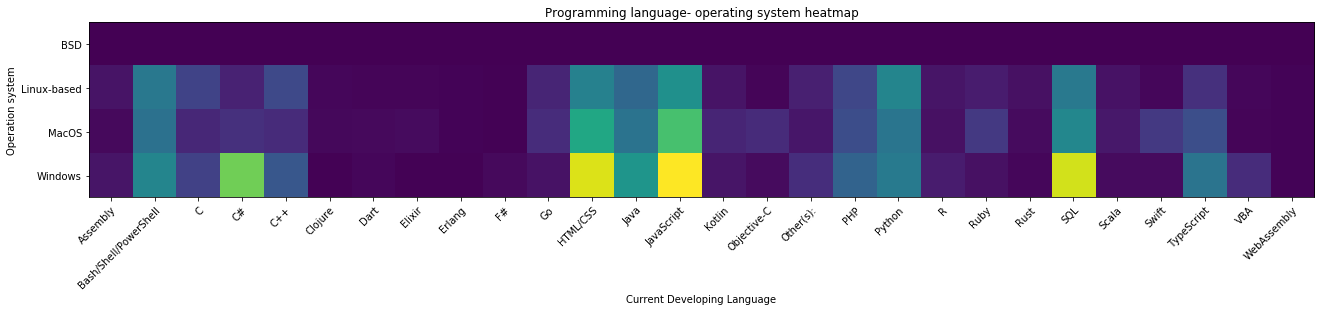

In [117]:
#create heatmap about programming language and operation system

df_heatmap = lang_os_summary.pivot(columns='LanguageWorkedWith', index='OpSys', values='counts')

df_heatmap.fillna(0, inplace = True)

hm_arr = df_heatmap.to_numpy()

y_tag = df_heatmap.columns

x_tag = df_heatmap.index

fig = heatmap_plot(hm_arr, y_tag, x_tag, 
                   xlabel = 'Current Developing Language', 
                   ylabel = 'Operation system', 
                   title = 'Programming language- operating system heatmap')

fig.savefig('./output/language_os.png', dpi=100)

plt.show()

## Findings:
The finding is presented as heatmap.
If you are not sure about future needs, choose windows.
If you need versatility, choose windows. 

## Question 8: <a class="anchor" id="Q8"> </a>

Related to working environment and relationship.

For people think their managers are incompetent (to certain level), are they considering themselve above average or not, how about they mean salary?

In [145]:
temp = df_filtered.groupby(['MgrIdiot']).mean(numeric_only = True)
temp

,Respondent,Age1stCode,YearsCodePro,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
MgrIdiot,,,,,,,,
I don't have a manager,43851.387667,15.450765,8.378352,4.588716e+05,107880.499647,41.978605,5.641382,31.987278
Not at all confident,44233.038567,15.601212,7.900128,2.760123e+07,110343.203982,42.626282,4.983151,31.594496
Somewhat confident,44288.460666,15.511281,7.438869,6.818745e+06,120217.865526,42.010526,4.909944,30.854229
Very confident,44866.443888,15.487585,7.359698,4.569934e+10,137930.204426,41.824498,4.861100,30.545674


## Findings:

Put the findings short and sweet:
The developers who think highly of their managers, tend to earn more and work less hours.

## Question 9: <a class="anchor" id="Q9"> </a>

What is the effect of gender on developer's career, in terms of salary, working hours and job satifactions?

In [121]:
df_filtered['Gender'].unique()

array(['Man', 'Woman', nan,
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [122]:
df_filtered['Gender'].value_counts(dropna=False)

Man                                                            49262
Woman                                                           3730
NaN                                                              568
Non-binary, genderqueer, or gender non-conforming                293
Man;Non-binary, genderqueer, or gender non-conforming            106
Woman;Non-binary, genderqueer, or gender non-conforming           94
Woman;Man                                                         38
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

In [124]:
#The answer for this question is really messly,
#and the answers of 'man' and 'woman' are the majority of the data.
#I think it is reasonable easy enough just to filter out the rest.
#Again, I am only focusing on the working age range of 20-60 years old.

# TargetGender = ['Man', 'Woman']
summary = df_filtered[((df_filtered['Gender'] == 'Man') | (df_filtered['Gender'] == 'Woman'))]\
    .groupby(['Age_bin','Gender']).mean(numeric_only = True)[['ConvertedComp','WorkWeekHrs','JobSatLevel']]
summary.reset_index(inplace=True) 
summary = summary[~((summary['Age_bin']=='0-20') | (summary['Age_bin']=='60-100'))]

summary = summary.pivot(index='Age_bin', columns='Gender', values='ConvertedComp')
# summary
summary.reset_index(inplace=True) 

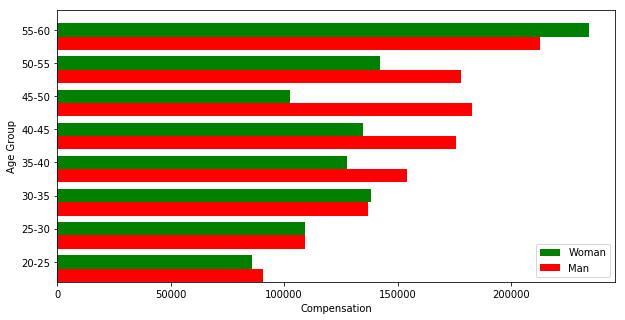

In [131]:
#create plot for comparison

fig, ax1 = plt.subplots(figsize=(10, 5))
width = 0.4

ind_1 = np.arange(len(summary))
ax1.barh(ind_1 + width, summary['Woman'], width, color='green', label='Woman')
ax1.barh(ind_1, summary['Man'], width, color='red', label='Man')
ax1.set(yticks=ind_1 + width, yticklabels=summary['Age_bin'], ylim=[2*width - 1, len(summary)])
ax1.legend()
ax1.set_ylabel('Age Group')
ax1.set_xlabel('Compensation')


fig.savefig('./output/Gender_Compensation.png', dpi=100)

## Findings:

Women are generally happier about their career than men. Natually optismistic or less expection?

It seems that women developers tend to work harder than the male counterpart in early caeer, despite earning less. 
Overtime, women tend to earn slightly more than men, with the same working hours. 

But after 35 years old, women generally work less and earn less. maybe because of raising kids? 

With working time considered, I did not find gender gap in developer's salary.

# Conclusion

This project answered many of questions I had before. It might not be correctly answered based on the limited data and my analysis skill.

Regardless, I really appreciate Stackoverflow for providing the survey data.